<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

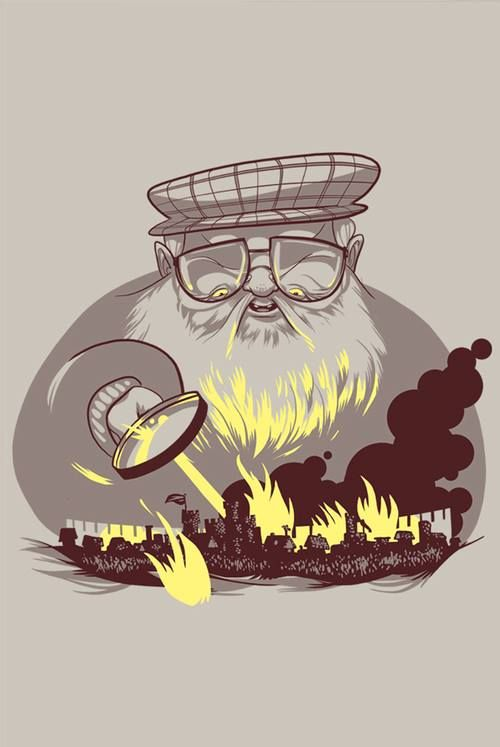

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

zsh:1: command not found: gdown
zsh:1: command not found: gdown


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("game_of_thrones_train.csv", index_col = "S.No")
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [5]:
data.isna().sum(axis=0) #кол-во пропусков в столбцах

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

<BarContainer object of 25 artists>

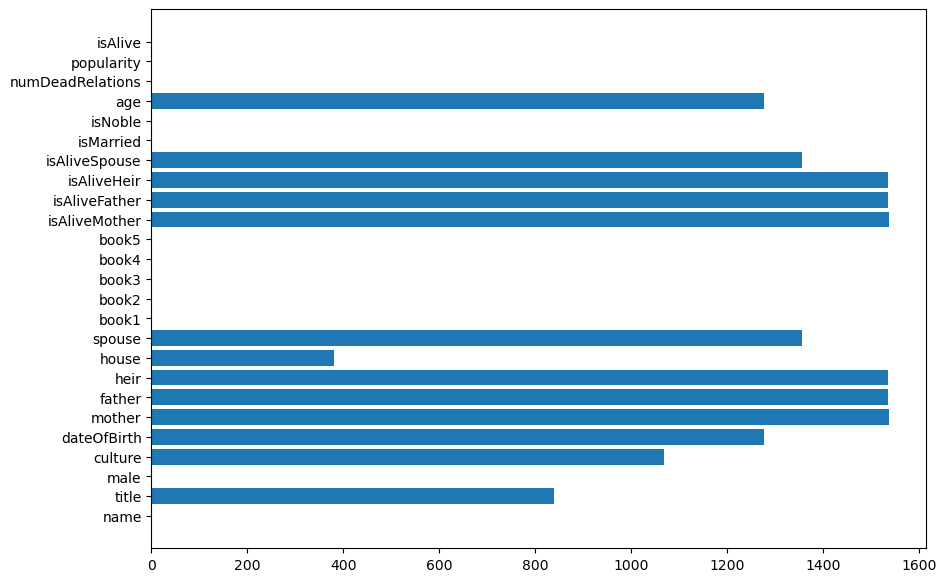

In [6]:
data1 = data.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data1.index, data1.values)

In [7]:
mean_Age = np.mean(data['age'].dropna().values)
median_Age = np.quantile(data['age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

Среднее = 35.29032258064516
Медиана = 24.0


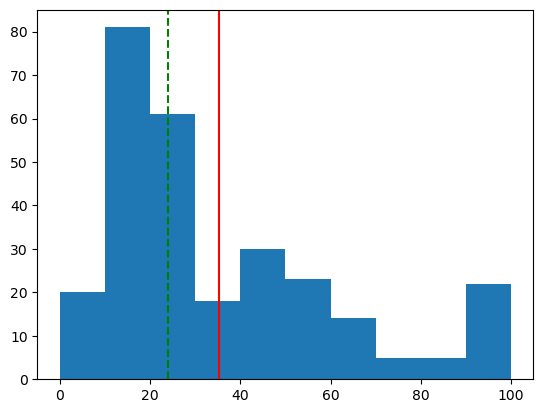

In [8]:
plt.hist(data['age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()
#тогда ориентируемся на моду(категориальных) или медиану(числовых) либо удалять

In [9]:
data.drop(columns=["mother", 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
data

,name,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,NaN,0,0,0,1,0,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,1,0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,1,0,1,1,0,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,House Seaworth,NaN,0,1,1,1,1,0,0,NaN,0,0.076923,0


In [10]:
data.isna().sum(axis=0)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

In [11]:
chislov = ["dateOfBirth", "age"] #заменяем на медиану
categor = ["title", 'culture','house', 'spouse'] #заменяем на мода

In [12]:
for i in ["dateOfBirth", "age"]:
    data[i][data[i].isna()] = np.quantile(data[i].dropna().values, q=0.5)
for j in ["title", 'culture','house', 'spouse']:
    data[j][data[j].isna()] = (data[j].dropna()).mode()[0]
data #теперь пробелов нет

/var/folders/k5/jw4r672d35d9cp_46fvgx3300000gp/T/ipykernel_9599/1252967018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i].isna()] = np.quantile(data[i].dropna().values, q=0.5)
/var/folders/k5/jw4r672d35d9cp_46fvgx3300000gp/T/ipykernel_9599/1252967018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i].isna()] = np.quantile(data[i].dropna().values, q=0.5)
/var/folders/k5/jw4r672d35d9cp_46fvgx3300000gp/T/ipykernel_9599/1252967018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

,name,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,House Frey,Walder Frey,0,0,0,0,0,0,0,24.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,Northmen,272.0,House Swyft,Walder Frey,0,0,0,1,0,0,1,24.0,0,0.267559,1
4,Aemma Arryn,Queen,0,Northmen,82.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,1,0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,272.0,House Frey,Walder Frey,1,0,1,1,0,0,1,24.0,0,0.160535,1
1554,Masha Heddle,Ser,0,Northmen,272.0,House Frey,Walder Frey,1,1,0,0,0,0,0,24.0,0,0.040134,0
1555,Matthos Seaworth,Ser,1,Northmen,272.0,House Seaworth,Walder Frey,0,1,1,1,1,0,0,24.0,0,0.076923,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [13]:
data.loc[(data.dateOfBirth + data.age)!=305, ['live']] = 0 
data.loc[(data.dateOfBirth + data.age)==305, ['live']] = 1 

In [14]:
data.loc[(data.popularity < 0.5), ['isPopularity']] = 0 #популярны или нет
data.loc[(data.popularity >= 0.5), ['isPopularity']] = 1

In [15]:
data.drop(columns=["popularity"], inplace=True)
data

,name,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,isAlive,live,isPopularity
S.No,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,House Frey,Walder Frey,0,0,0,0,0,0,0,24.0,11,0,0.0,1.0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,1,1,1,1,97.0,1,1,1.0,1.0
3,Addison Hill,Ser,1,Northmen,272.0,House Swyft,Walder Frey,0,0,0,1,0,0,1,24.0,0,1,0.0,0.0
4,Aemma Arryn,Queen,0,Northmen,82.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,1,1,23.0,0,0,0.0,0.0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,1,0,1,1,29.0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,272.0,House Frey,Walder Frey,1,0,1,1,0,0,1,24.0,0,1,0.0,0.0
1554,Masha Heddle,Ser,0,Northmen,272.0,House Frey,Walder Frey,1,1,0,0,0,0,0,24.0,0,0,0.0,0.0
1555,Matthos Seaworth,Ser,1,Northmen,272.0,House Seaworth,Walder Frey,0,1,1,1,1,0,0,24.0,0,0,0.0,0.0


In [16]:
data.loc[(data.numDeadRelations == 0 ), ['boolDeadRelations']] = 0 #есть отношения с мертвыми или нет
data.loc[(data.numDeadRelations > 0), ['boolDeadRelations']] = 1
data.drop(columns=["numDeadRelations"], inplace=True)
data

,name,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,live,isPopularity,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,House Frey,Walder Frey,0,0,0,0,0,0,0,24.0,0,0.0,1.0,1.0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,1,1,1,1,97.0,1,1.0,1.0,1.0
3,Addison Hill,Ser,1,Northmen,272.0,House Swyft,Walder Frey,0,0,0,1,0,0,1,24.0,1,0.0,0.0,0.0
4,Aemma Arryn,Queen,0,Northmen,82.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,1,1,23.0,0,0.0,0.0,0.0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,1,0,1,1,29.0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,272.0,House Frey,Walder Frey,1,0,1,1,0,0,1,24.0,1,0.0,0.0,0.0
1554,Masha Heddle,Ser,0,Northmen,272.0,House Frey,Walder Frey,1,1,0,0,0,0,0,24.0,0,0.0,0.0,0.0
1555,Matthos Seaworth,Ser,1,Northmen,272.0,House Seaworth,Walder Frey,0,1,1,1,1,0,0,24.0,0,0.0,0.0,0.0


In [17]:
data['culture'].value_counts()

culture
Northmen                   1163
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Stormlands                    4
Summer Isles                  4
Astapori                      4
Westeros                      3
Dornishmen                    3
Northern mountain clans       3
Ironmen                       3
Westermen                     3
Crannogmen                    2
Myrish                        2
Sistermen                     2
Meereenese                    2
First Men                     2
westermen                     2


In [18]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn' : ['ironborn'],
    'Vale mountain clans': ['Valemen', 'Vale'],
    'Lhazareen': ['Lhazarene']
    
}

In [19]:
for i in cult:
    data['culture'] = data['culture'].replace([j.lower() for j in cult[i]]+[" ".join([l.capitalize() for l in k.split()]) for k in cult[i]], i)
data

,name,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,live,isPopularity,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,House Frey,Walder Frey,0,0,0,0,0,0,0,24.0,0,0.0,1.0,1.0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,1,1,1,1,97.0,1,1.0,1.0,1.0
3,Addison Hill,Ser,1,Northmen,272.0,House Swyft,Walder Frey,0,0,0,1,0,0,1,24.0,1,0.0,0.0,0.0
4,Aemma Arryn,Queen,0,Northmen,82.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,1,1,23.0,0,0.0,0.0,0.0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,1,0,1,1,29.0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,272.0,House Frey,Walder Frey,1,0,1,1,0,0,1,24.0,1,0.0,0.0,0.0
1554,Masha Heddle,Ser,0,Northmen,272.0,House Frey,Walder Frey,1,1,0,0,0,0,0,24.0,0,0.0,0.0,0.0
1555,Matthos Seaworth,Ser,1,Northmen,272.0,House Seaworth,Walder Frey,0,1,1,1,1,0,0,24.0,0,0.0,0.0,0.0


In [20]:
([data["culture"].value_counts()])

[culture
 Northmen                   1172
 Ironborn                     92
 Free Folk                    49
 Braavosi                     40
 Valyrian                     28
 Vale mountain clans          23
 Dornish                      21
 Ghiscari                     18
 Dothraki                     17
 Westermen                    14
 Reach                        13
 Rivermen                     10
 Free folk                     7
 Summer Islands                6
 Tyroshi                       6
 Qartheen                      6
 Stormlander                   4
 Astapori                      4
 Westerosi                     3
 Northern mountain clans       3
 Ironmen                       3
 Lysene                        3
 Meereenese                    2
 Andal                         2
 Myrish                        2
 Sistermen                     2
 Lhazareen                     2
 Crannogmen                    2
 Norvoshi                      1
 Qohor                         1
 

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [21]:
data.drop(columns=['name'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

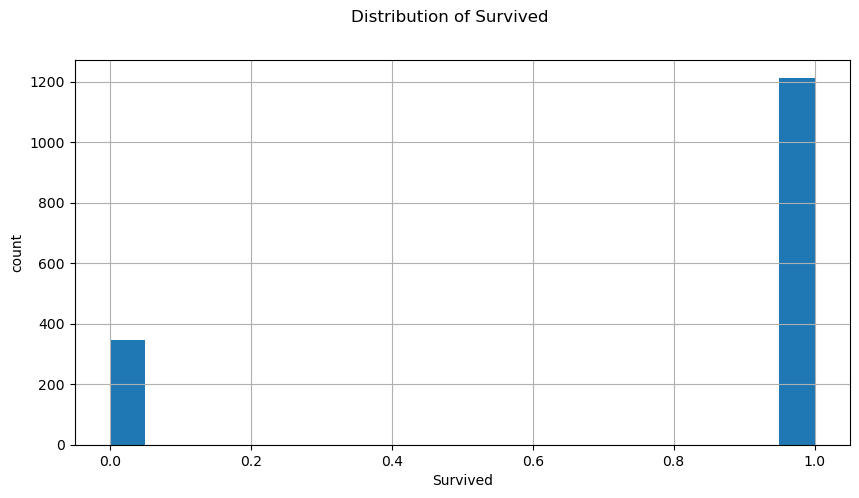

In [22]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Survived')

plt.suptitle('Distribution of Survived')
plt.show()
#сильный перекос!
#целевая переменная - категориальные

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [23]:
data.columns

Index(['title', 'male', 'culture', 'dateOfBirth', 'house', 'spouse', 'book1',
       'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'age',
       'isAlive', 'live', 'isPopularity', 'boolDeadRelations'],
      dtype='object')

In [24]:
categorical_columns = ['house', 'spouse','title','male', 'culture', 'book1', 'book2','book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isPopularity', 'boolDeadRelations' ]

In [25]:
categorical_features = data[categorical_columns]
categorical_features

,house,spouse,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,isPopularity,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,House Frey,Walder Frey,Ser,1,Northmen,0,0,0,0,0,0,0,1.0,1.0
2,House Frey,Perra Royce,Lord of the Crossing,1,Rivermen,1,1,1,1,1,1,1,1.0,1.0
3,House Swyft,Walder Frey,Ser,1,Northmen,0,0,0,1,0,0,1,0.0,0.0
4,House Arryn,Viserys I Targaryen,Queen,0,Northmen,0,0,0,0,0,1,1,0.0,0.0
5,House Santagar,Eldon Estermont,Greenstone,0,Dornish,0,0,0,1,0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,House Frey,Walder Frey,Archmaester,1,Northmen,1,0,1,1,0,0,1,0.0,0.0
1554,House Frey,Walder Frey,Ser,0,Northmen,1,1,0,0,0,0,0,0.0,0.0
1555,House Seaworth,Walder Frey,Ser,1,Northmen,0,1,1,1,1,0,0,0.0,0.0


In [26]:
#Найдем только не числовые 
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['house', 'spouse', 'title', 'culture']

In [27]:
data[unprocessed_cat_features]

,house,spouse,title,culture
S.No,,,,
1,House Frey,Walder Frey,Ser,Northmen
2,House Frey,Perra Royce,Lord of the Crossing,Rivermen
3,House Swyft,Walder Frey,Ser,Northmen
4,House Arryn,Viserys I Targaryen,Queen,Northmen
5,House Santagar,Eldon Estermont,Greenstone,Dornish
...,...,...,...,...
1553,House Frey,Walder Frey,Archmaester,Northmen
1554,House Frey,Walder Frey,Ser,Northmen
1555,House Seaworth,Walder Frey,Ser,Northmen


In [28]:
for i in data['house'].unique():
    if data['house'].value_counts()[i] in [1,2]:
        data.loc[data["house"] == i, 'house'] = 'Other'

for i in data['title'].unique():
    if data['title'].value_counts()[i] in [1,2]:
        data.loc[data["title"] == i, 'title'] = 'Other'

for i in data['spouse'].unique():
    if data['spouse'].value_counts()[i] in [1,2]:
        data.loc[data["spouse"] == i, 'spouse'] = 'Other'

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  data[column] = label_encoding.fit_transform(data[column])
data

,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,live,isPopularity,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,
1,27,1,16,272.0,41,2,0,0,0,0,0,0,0,24.0,0,0.0,1.0,1.0
2,20,1,22,208.0,41,1,1,1,1,1,1,1,1,97.0,1,1.0,1.0,1.0
3,27,1,16,272.0,89,2,0,0,0,1,0,0,1,24.0,1,0.0,0.0,0.0
4,24,0,16,82.0,9,1,0,0,0,0,0,1,1,23.0,0,0.0,0.0,0.0
5,20,0,4,276.0,111,1,0,0,0,1,0,1,1,29.0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0,1,16,272.0,41,2,1,0,1,1,0,0,1,24.0,1,0.0,0.0,0.0
1554,27,0,16,272.0,41,2,1,1,0,0,0,0,0,24.0,0,0.0,0.0,0.0
1555,27,1,16,272.0,79,2,0,1,1,1,1,0,0,24.0,0,0.0,0.0,0.0


In [30]:
numerical_columns = ['dateOfBirth', 'age'] #теперь количественные признаки

In [31]:
num_features = data[numerical_columns]
num_features

,dateOfBirth,age
S.No,,
1,272.0,24.0
2,208.0,97.0
3,272.0,24.0
4,82.0,23.0
5,276.0,29.0
...,...,...
1553,272.0,24.0
1554,272.0,24.0
1555,272.0,24.0


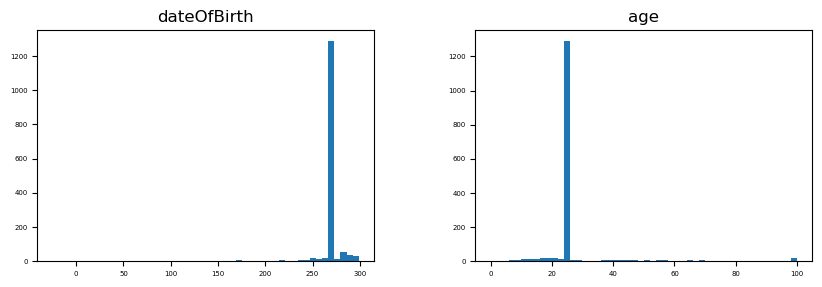

In [32]:
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False);

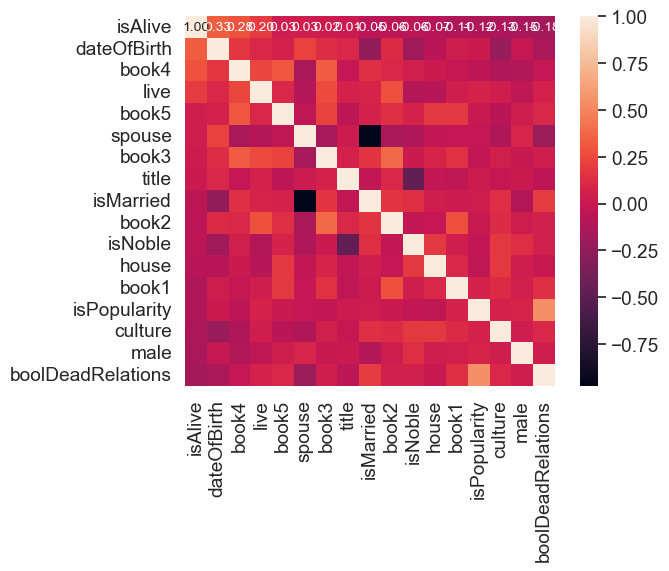

In [33]:
# correlation matrix
corrmat = data.corr()
k = 17 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

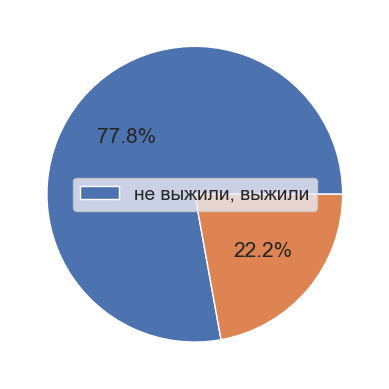

In [34]:
data_ = data['isAlive'].value_counts()

# Строим круговую диаграмму
plt.pie(data_, autopct='%1.1f%%')

plt.legend(['не выжили, выжили'])

plt.show()

In [55]:

data2 = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")
data2.drop(columns=["mother", 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
for i in ["dateOfBirth", "age"]:
    data2[i][data2[i].isna()] = np.mean(data2[i].dropna().values)
for j in ["title", 'culture','house', 'spouse']:
    data2[j][data2[j].isna()] = (data2[j].dropna()).mode()[0]#теперь пробелов нет
    
data2.loc[(data2.dateOfBirth + data2.age)!=305, ['live']] = 0 
data2.loc[(data2.dateOfBirth + data2.age)==305, ['live']] = 1 
    
data2.loc[(data2.popularity < 0.5), ['isPopularity']] = 0 #популярны или нет
data2.loc[(data2.popularity >= 0.5), ['isPopularity']] = 1
data2.drop(columns=["popularity"], inplace=True)

data2.loc[(data2.numDeadRelations == 0 ), ['boolDeadRelations']] = 0 #есть отношения с мертвыми или нет
data2.loc[(data2.numDeadRelations > 0), ['boolDeadRelations']] = 1
data2.drop(columns=["numDeadRelations"], inplace=True)

for i in cult:
    data2['culture'] = data2['culture'].replace([j.lower() for j in cult[i]]+[" ".join([l.capitalize() for l in k.split()]) for k in cult[i]], i)

data2.drop(columns=['name'], inplace = True)
categorical_features2 = data2[categorical_columns]
unprocessed_cat_features2 = categorical_features2.select_dtypes(include=[object]).columns.tolist()

for i in data['house'].unique():
    if data['house'].value_counts()[i] in [1,2]:
        data.loc[data["house"] == i, 'house'] = 'Other'

for i in data['title'].unique():
    if data['title'].value_counts()[i] in [1,2]:
        data.loc[data["title"] == i, 'title'] = 'Other'

for i in data['spouse'].unique():
    if data['spouse'].value_counts()[i] in [1,2]:
        data.loc[data["spouse"] == i, 'spouse'] = 'Other'
        
label_encoding2 = LabelEncoder()

for column in unprocessed_cat_features2:
  data2[column] = label_encoding2.fit_transform(data2[column])

#test2

/var/folders/k5/jw4r672d35d9cp_46fvgx3300000gp/T/ipykernel_9599/1095643450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i][data2[i].isna()] = np.mean(data2[i].dropna().values)
/var/folders/k5/jw4r672d35d9cp_46fvgx3300000gp/T/ipykernel_9599/1095643450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i][data2[i].isna()] = np.mean(data2[i].dropna().values)
/var/folders/k5/jw4r672d35d9cp_46fvgx3300000gp/T/ipykernel_9599/1095643450.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [67]:
data2

,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,live,isPopularity,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1558,94,0,19,156.000000,22,69,0,0,0,0,1,0,0,100.000000,0.0,0.0,0.0
1559,94,0,0,3986.571429,128,69,0,1,1,1,1,0,0,-3701.032468,0.0,1.0,0.0
1560,94,0,19,3986.571429,6,69,0,0,1,1,0,0,0,-3701.032468,0.0,0.0,0.0
1561,94,1,19,3986.571429,106,69,1,1,1,1,1,0,1,-3701.032468,0.0,0.0,0.0
1562,94,1,26,262.000000,50,42,1,1,1,1,1,1,0,38.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,94,1,34,3986.571429,95,69,1,1,1,1,1,0,0,-3701.032468,0.0,0.0,0.0
1943,94,1,19,3986.571429,23,69,0,1,0,1,1,0,0,-3701.032468,0.0,0.0,0.0
1944,94,1,19,3986.571429,102,69,1,1,1,1,1,0,0,-3701.032468,0.0,0.0,0.0


In [68]:
data

,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,live,isPopularity,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,
1,27,1,16,272.0,41,2,0,0,0,0,0,0,0,24.0,0,0.0,1.0,1.0
2,20,1,22,208.0,41,1,1,1,1,1,1,1,1,97.0,1,1.0,1.0,1.0
3,27,1,16,272.0,89,2,0,0,0,1,0,0,1,24.0,1,0.0,0.0,0.0
4,24,0,16,82.0,9,1,0,0,0,0,0,1,1,23.0,0,0.0,0.0,0.0
5,20,0,4,276.0,111,1,0,0,0,1,0,1,1,29.0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0,1,16,272.0,41,2,1,0,1,1,0,0,1,24.0,1,0.0,0.0,0.0
1554,27,0,16,272.0,41,2,1,1,0,0,0,0,0,24.0,0,0.0,0.0,0.0
1555,27,1,16,272.0,79,2,0,1,1,1,1,0,0,24.0,0,0.0,0.0,0.0


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [57]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values
y

array([0, 1, 1, ..., 0, 1, 0])

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [58]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [69]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [70]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [71]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [72]:
ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train, y_train)
y_pred = ada_boost_classifier.predict(X_test)

In [73]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)

In [74]:
kneighbors_classifier = KNeighborsClassifier()
kneighbors_classifier.fit(X_train, y_train)
y_pred = kneighbors_classifier.predict(X_test)

In [75]:
gaussian_process_classifier = GaussianProcessClassifier()
gaussian_process_classifier.fit(X_train, y_train)
y_pred = gaussian_process_classifier.predict(X_test)

In [76]:
gaussian_NB = GaussianNB()
gaussian_NB.fit(X_train, y_train)
y_pred = gaussian_NB.predict(X_test)

In [77]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [78]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [49]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [83]:
# Шаг 3. Предсказание на тестовых данных
ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train, y_train)
y_pred = ada_boost_classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [82]:
for i in [ada_boost_classifier, random_forest_classifier, kneighbors_classifier,gaussian_process_classifier,gaussian_NB,svc,decision_tree_classifier]:
    y_pred = i.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy {i}: %.4f" % accuracy)

Accuracy AdaBoostClassifier(): 0.8205
Accuracy RandomForestClassifier(): 0.8013
Accuracy KNeighborsClassifier(): 0.7724
Accuracy GaussianProcessClassifier(): 0.7628
Accuracy GaussianNB(): 0.6923
Accuracy SVC(): 0.7949
Accuracy DecisionTreeClassifier(): 0.7468


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [52]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

zsh:1: command not found: gdown


In [53]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

FileNotFoundError: [Errno 2] No such file or directory: '/content/submission.csv'

In [ ]:
submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)